<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/Water_quality_Dataset__Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the data
df = pd.read_csv('/content/waterQuality1.csv', index_col = 0)
df.head()

,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,,,,,,,,,,,,,,,,,,,,
1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [15]:
# Replace '#NUM!' with NaN
df = df.replace('#NUM!', np.nan)

# Drop missing values
df.dropna(inplace=True)

In [17]:
# Seperating the input and output features
X = df.drop('is_safe', axis=1)
y = df['is_safe']

In [19]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Performing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Creating the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Taking the predictions from the model
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [30]:
# Predict
y_pred = clf.predict(X_test)

In [34]:
# Model Evaluation
print('Training Accuracy: ', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision: ', np.round(metrics.precision_score(y_train, y_train_pred, pos_label='1'), 2)) # Changed here
print('Training Recall: ', np.round(metrics.recall_score(y_train, y_train_pred, pos_label='1'), 2)) # Changed here
print('Training F1 Score: ', np.round(metrics.f1_score(y_train, y_train_pred, pos_label='1'), 2)) # Changed here

print('\nTesting Accuracy: ', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision: ', np.round(metrics.precision_score(y_test, y_pred, pos_label='1'), 2)) # Changed here
print('Testing Recall: ', np.round(metrics.recall_score(y_test, y_pred, pos_label='1'), 2)) # Changed here
print('Testing F1 Score: ', np.round(metrics.f1_score(y_test, y_pred, pos_label='1'), 2)) # Changed here

Training Accuracy:  0.96
Training Precision:  0.86
Training Recall:  0.74
Training F1 Score:  0.8

Testing Accuracy:  0.87
Testing Precision:  0.47
Testing Recall:  0.32
Testing F1 Score:  0.38


In [39]:
# Evaluate
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy_Score:",np.round(accuracy_score(y_test, y_pred),2)*100,"%")

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1400
           1       0.47      0.32      0.38       200

    accuracy                           0.87      1600
   macro avg       0.69      0.63      0.65      1600
weighted avg       0.85      0.87      0.86      1600

Accuracy_Score: 87.0 %


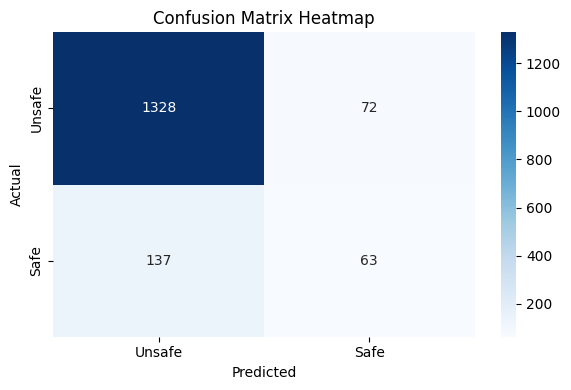

In [38]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unsafe', 'Safe'], yticklabels=['Unsafe', 'Safe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

In [40]:
y_test

,is_safe
aluminium,
0.01,0
0.27,0
0.02,1
0.01,0
0.02,0
...,...
0.01,0
3.83,0
0.09,0


In [41]:
X_test

,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
aluminium,,,,,,,,,,,,,,,,,,,
0.01,0.13,0.09,0.31,0.050,0.10,0.03,1.69,1.32,0.00,0.990,0.063,17.60,0.89,0.003,1.03,0.90,0.07,0.03,0.00
0.27,26.73,0.04,0.27,0.007,0.78,0.90,1.86,0.26,0.55,0.550,0.013,1.74,1.24,0.008,11.52,1.34,0.03,0.19,0.05
0.02,17.13,0.26,3.13,0.110,4.01,0.20,0.05,0.13,0.94,0.940,0.001,6.06,2.02,0.002,32.03,4.64,0.04,0.05,0.02
0.01,3.25,0.07,0.74,0.060,0.26,0.04,1.95,1.29,0.00,0.000,0.088,17.04,1.12,0.004,8.65,4.98,0.09,0.06,0.05
0.02,1.95,0.07,0.92,0.010,0.11,0.04,1.22,0.33,0.00,0.000,0.151,2.46,2.05,0.000,7.82,1.46,0.10,0.10,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.01,26.45,0.07,1.27,0.080,0.06,0.08,1.71,0.80,0.13,0.009,0.176,16.11,1.19,0.006,0.27,0.12,0.01,0.00,0.01
3.83,19.07,0.92,1.61,0.110,6.66,0.70,0.29,0.50,0.00,0.000,0.136,18.97,2.25,0.001,33.42,3.09,0.02,0.38,0.02
0.09,0.22,0.05,0.91,0.070,0.36,0.06,1.66,0.79,0.73,0.730,0.059,5.33,1.33,0.006,0.79,2.99,0.06,0.06,0.05


In [43]:
X_test.shape

(1600, 19)

In [51]:
X_test_reshaped = X_test.values.reshape(-1, 19) # Call reshape with the desired shape
print(X_test_reshaped.shape) # Check the shape of the new NumPy array(-1, 19)

(1600, 19)


In [54]:
print("ACTUAL OUTPUT    : ",y_test)
print("PREDICTED OUTPUT : ",clf.predict(X_test.values.reshape(-1, 19))[0])

ACTUAL OUTPUT    :  aluminium
0.01    0
0.27    0
0.02    1
0.01    0
0.02    0
       ..
0.01    0
3.83    0
0.09    0
0.05    0
3.01    0
Name: is_safe, Length: 1600, dtype: object
PREDICTED OUTPUT :  0
